In [1]:
# importing the necessary modules
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
import seaborn as sns 

## Product relationships and propensity to purchase

The questions to answer with this data are:
- What product category leads to the highest spend on the return purchases?
- What product category leads to the fastest return to purchase?
- What are the chances that they return to purchase the same item?
- If a customer purchases X product category first, what are they likely to buy next and when?
- If a customer doesn’t repurchase again within ‘X’ amount of time, they are unlikely to purchase again for X (by product category)


In [2]:
d = pd.read_excel("productRelationships.xlsx", sheet_name = 'Data')
d = d.drop(columns = "Client_Id")
d.rename(columns = {'Repurchase_Period':'period','First_Product_Category':'first','Subsequent_Product_Category':'subs','Subsequent_Items_Ordered':'subsqty','Subsequent_Net_Value_before_Returns':'subsnet'},inplace=True)
d

,period,first,subs,subsqty,subsnet
0,00 - 06 Month,ACC BAG,ACC BOTTLE,3,22.38
1,00 - 06 Month,ACC BAG,ACC NOISE MAKER,1,9.13
2,00 - 06 Month,ACC BASKET,SCOOTER ELECTRIC,1,416.63
3,00 - 06 Month,ACC BELL,SPARES CLAMPS,2,14.92
4,00 - 06 Month,ACC BELL,SPARES WHEELS,13,161.61
...,...,...,...,...,...
13092,55 - 60 Month,SCOOTER SPRITE,ACC WINDMILL,1,4.96
13093,55 - 60 Month,SCOOTER SPRITE,SCOOTER ADULT,4,469.02
13094,55 - 60 Month,SPARES BRAKE,SCOOTER MAXI,1,127.46
13095,55 - 60 Month,SPARES OTHER,SCOOTER ADULT,1,104.13


<AxesSubplot:ylabel='period'>

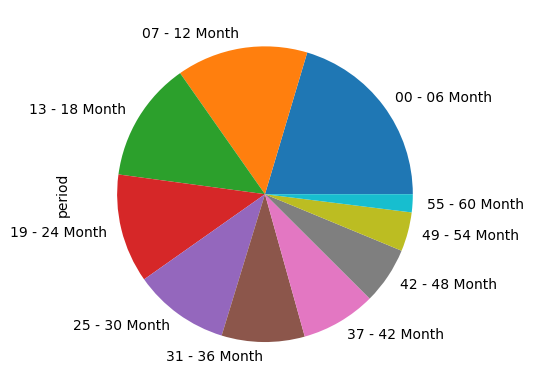

In [3]:
d['period'].value_counts().plot(kind='pie')

# grouping into subcategories

I'm not sure how these caterogies will be condensed down. I have used the example of any first purhcase begining with $\textit{'ACC'}$ and seeing what the relationship between subsequent categoriey is and how it changes over time. 


In [17]:
#Grabbing 
acc = d['first'].str.contains('ACC ')

In [18]:
dx = d.loc[acc]
dx

,period,first,subs,subsqty,subsnet
0,00 - 06 Month,ACC BAG,ACC BOTTLE,3,22.38
1,00 - 06 Month,ACC BAG,ACC NOISE MAKER,1,9.13
2,00 - 06 Month,ACC BASKET,SCOOTER ELECTRIC,1,416.63
3,00 - 06 Month,ACC BELL,SPARES CLAMPS,2,14.92
4,00 - 06 Month,ACC BELL,SPARES WHEELS,13,161.61
...,...,...,...,...,...
13061,55 - 60 Month,ACC OTHER,SPARES WHEELS,1,14.13
13062,55 - 60 Month,ACC PULL AND CARRY,BUNDLES GHOST STOCK,1,99.96
13063,55 - 60 Month,ACC RIBBON,SPARES WHEELS,2,16.54
13083,55 - 60 Month,ACC HELMET,BUNDLES,1,87.46


# RelPlot
This shows the trend over time for subsequent purhcases after purchasing the $\textit{ACC BOTTLE}$ and as expected does show that there is less likelihood of subsequent purchases as time goes on.

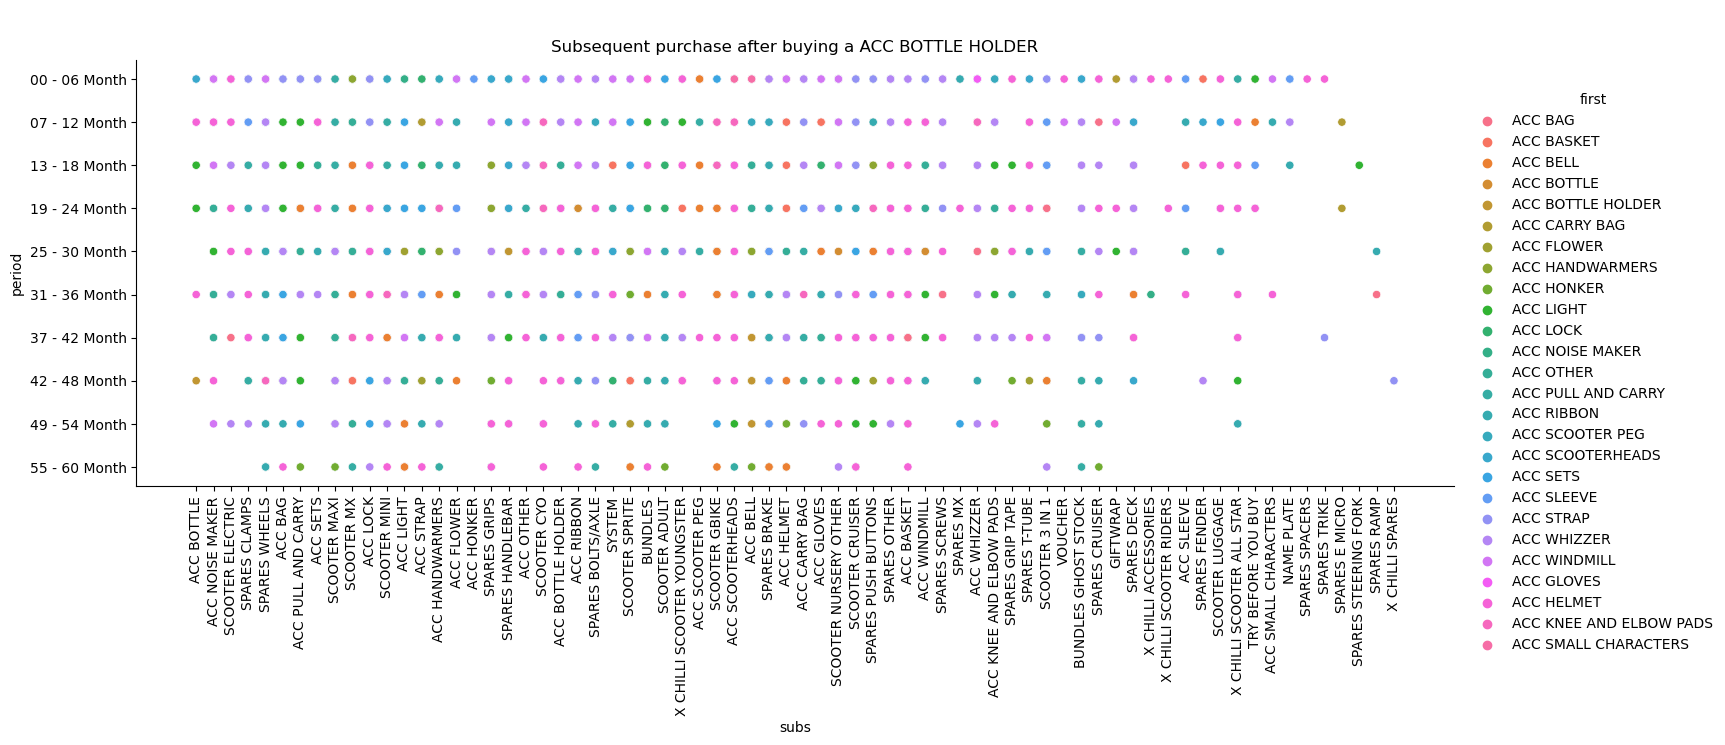

In [19]:
sns.relplot(data=dx, x="subs",y = 'period',aspect = 3,hue='first')
plt.title("Subsequent purchase after buying a ACC BOTTLE HOLDER")
plt.tick_params(axis='x', rotation = 90)
plt.savefig("Subsequentpurch.pdf")

Text(0.5, 0, 'Category')

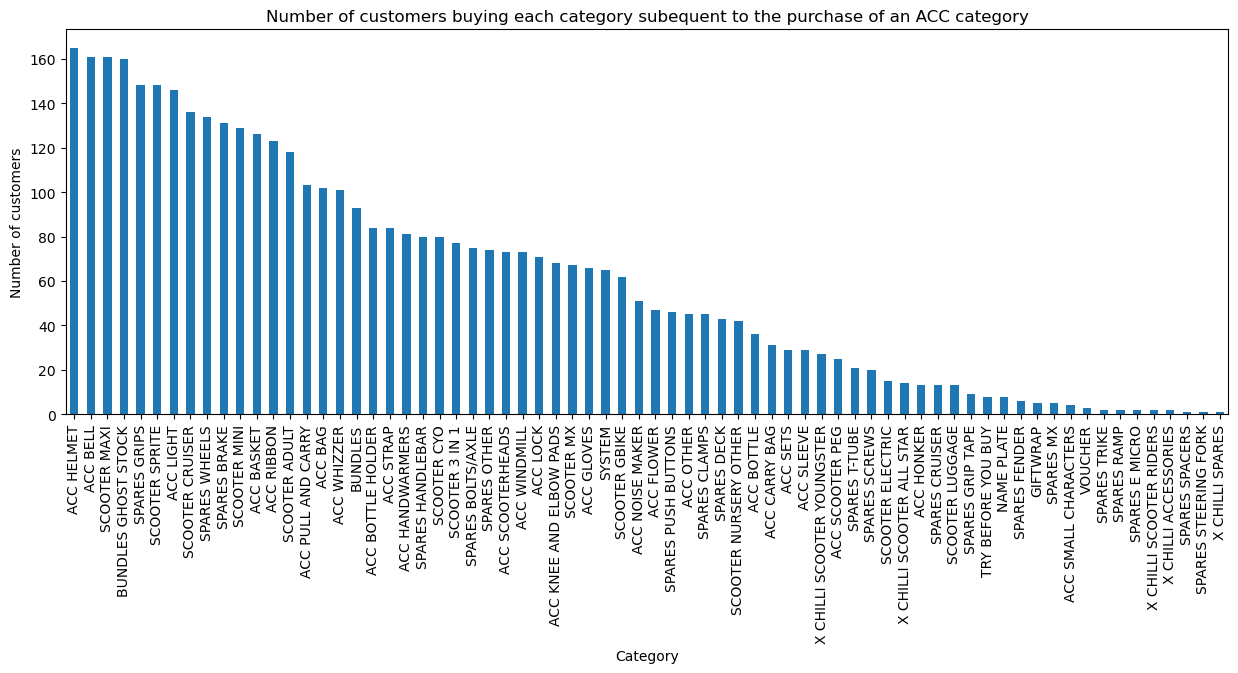

In [37]:
dx['subs'].value_counts().plot(kind='bar',figsize=(15,5))
plt.title('Number of customers buying each category subequent to the purchase of an ACC category')
plt.ylabel('Number of customers')
plt.xlabel('Category')

So the table above shows that when you purchase products begining with 'ACC' and the subsequent products are 'ACC' also, the following values are shown

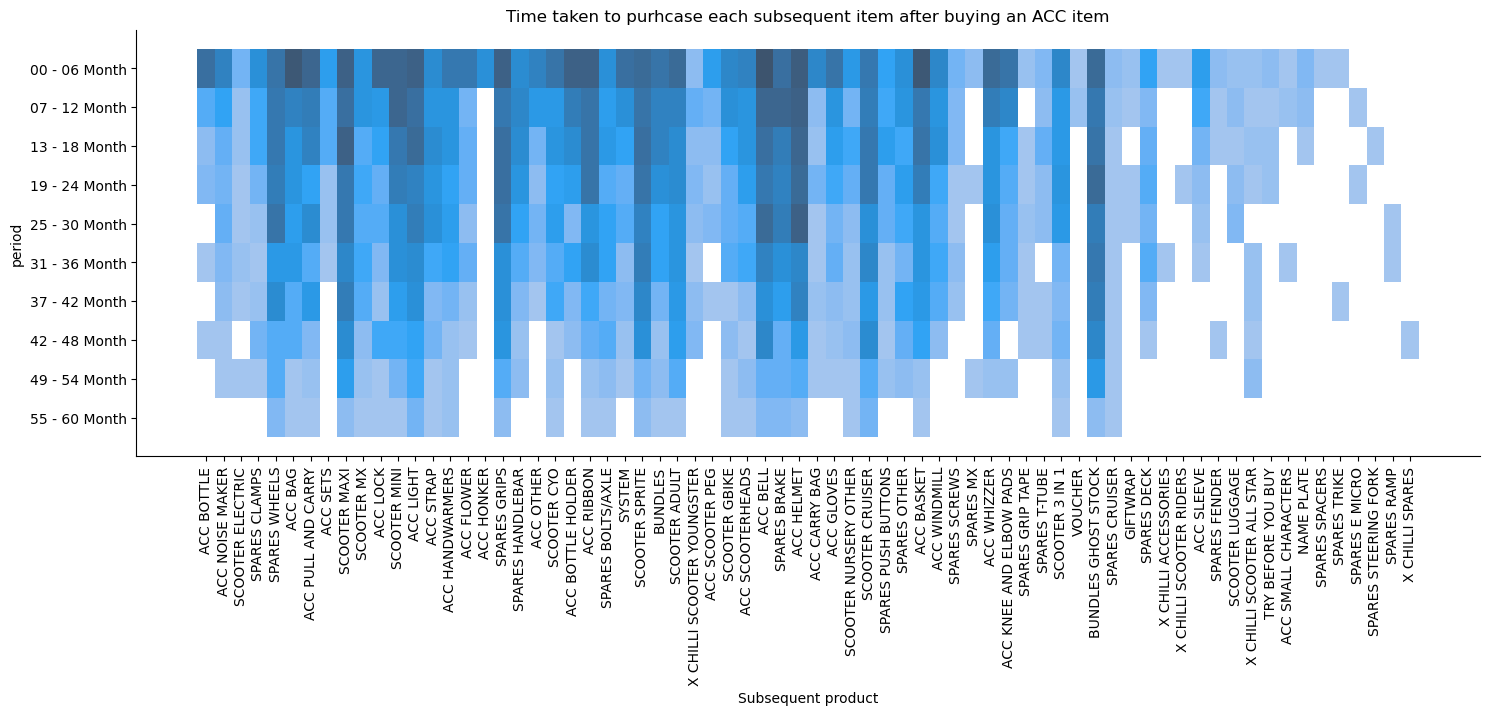

In [31]:
sns.displot(data=dx, x="subs",y = 'period',aspect = 3, legend ='qty')
plt.title("Time taken to purhcase each subsequent item after buying an ACC item")
plt.tick_params(axis='x', rotation=90)
plt.xlabel("Subsequent product")
plt.savefig('histogram')

In [38]:
d.describe()

,subsqty,subsnet
count,13097.000000,13097.000000
mean,35.187982,956.059792
std,279.900969,7589.753437
min,1.000000,0.010000
25%,1.000000,16.670000
50%,3.000000,74.960000
75%,12.000000,292.380000
max,17393.000000,474337.400000


In [9]:
# reading headers
d.columns

Index(['period', 'first', 'subs', 'subsqty', 'subsnet'], dtype='object')

In [10]:
#read each column 
d[['subs','subsqty']]

,subs,subsqty
0,ACC BOTTLE,3
1,ACC NOISE MAKER,1
2,SCOOTER ELECTRIC,1
3,SPARES CLAMPS,2
4,SPARES WHEELS,13
...,...,...
13092,ACC WINDMILL,1
13093,SCOOTER ADULT,4
13094,SCOOTER MAXI,1
13095,SCOOTER ADULT,1


In [11]:
#reading a specific row
d.iloc[1]

period       00 - 06 Month
first              ACC BAG
subs       ACC NOISE MAKER
subsqty                  1
subsnet               9.13
Name: 1, dtype: object

In [12]:
d.loc[d['subs'] == "ACC BOTTLE HOLDER"]

,period,first,subs,subsqty,subsnet
27,00 - 06 Month,ACC PULL AND CARRY,ACC BOTTLE HOLDER,116,657.72
41,00 - 06 Month,ACC SETS,ACC BOTTLE HOLDER,35,224.59
93,00 - 06 Month,ACC SCOOTER PEG,ACC BOTTLE HOLDER,1,4.96
178,00 - 06 Month,ACC BASKET,ACC BOTTLE HOLDER,3,11.79
186,00 - 06 Month,ACC BOTTLE HOLDER,ACC BOTTLE HOLDER,27,139.71
...,...,...,...,...,...
12405,49 - 54 Month,SPARES BRAKE,ACC BOTTLE HOLDER,1,3.19
12560,49 - 54 Month,SCOOTER 3 IN 1,ACC BOTTLE HOLDER,8,41.41
12706,49 - 54 Month,SCOOTER MAXI,ACC BOTTLE HOLDER,1,3.58
12736,49 - 54 Month,BUNDLES,ACC BOTTLE HOLDER,1,3.83


In [13]:
d2 = pd.read_excel('productRelationships.xlsx', sheet_name='Sheet1')
d2.head()

,First Product Category,ACC BAG,ACC BASKET,ACC BELL,ACC BOTTLE,ACC BOTTLE HOLDER,ACC CARRY BAG,ACC FLOWER,ACC GLOVES,ACC HANDWARMERS,...,SPARES WHEELS,SYSTEM,TRY BEFORE YOU BUY,VOUCHER,X CHILLI ACCESSORIES,X CHILLI SCOOTER ALL STAR,X CHILLI SCOOTER RIDERS,X CHILLI SCOOTER YOUNGSTER,X CHILLI SPARES,Grand Total
0,ACC BAG,14.0,NaN,17.0,3.0,NaN,NaN,NaN,2.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123
1,ACC BASKET,43.0,35.0,19.0,4.0,3.0,NaN,NaN,NaN,3.0,...,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275
2,ACC BELL,273.0,535.0,140.0,NaN,6.0,NaN,1.0,9.0,5.0,...,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335
3,ACC BOTTLE,38.0,5.0,20.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
4,ACC BOTTLE HOLDER,74.0,36.0,183.0,143.0,27.0,NaN,NaN,NaN,1.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532


# Heat map

This would be quite cluncky for individual trends however, overall it does show a general correlation. AS expected, there is also a high correlation for buying the same category subsequently by the diagonal.

/tmp/ipykernel_441270/826603011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d2.corr()


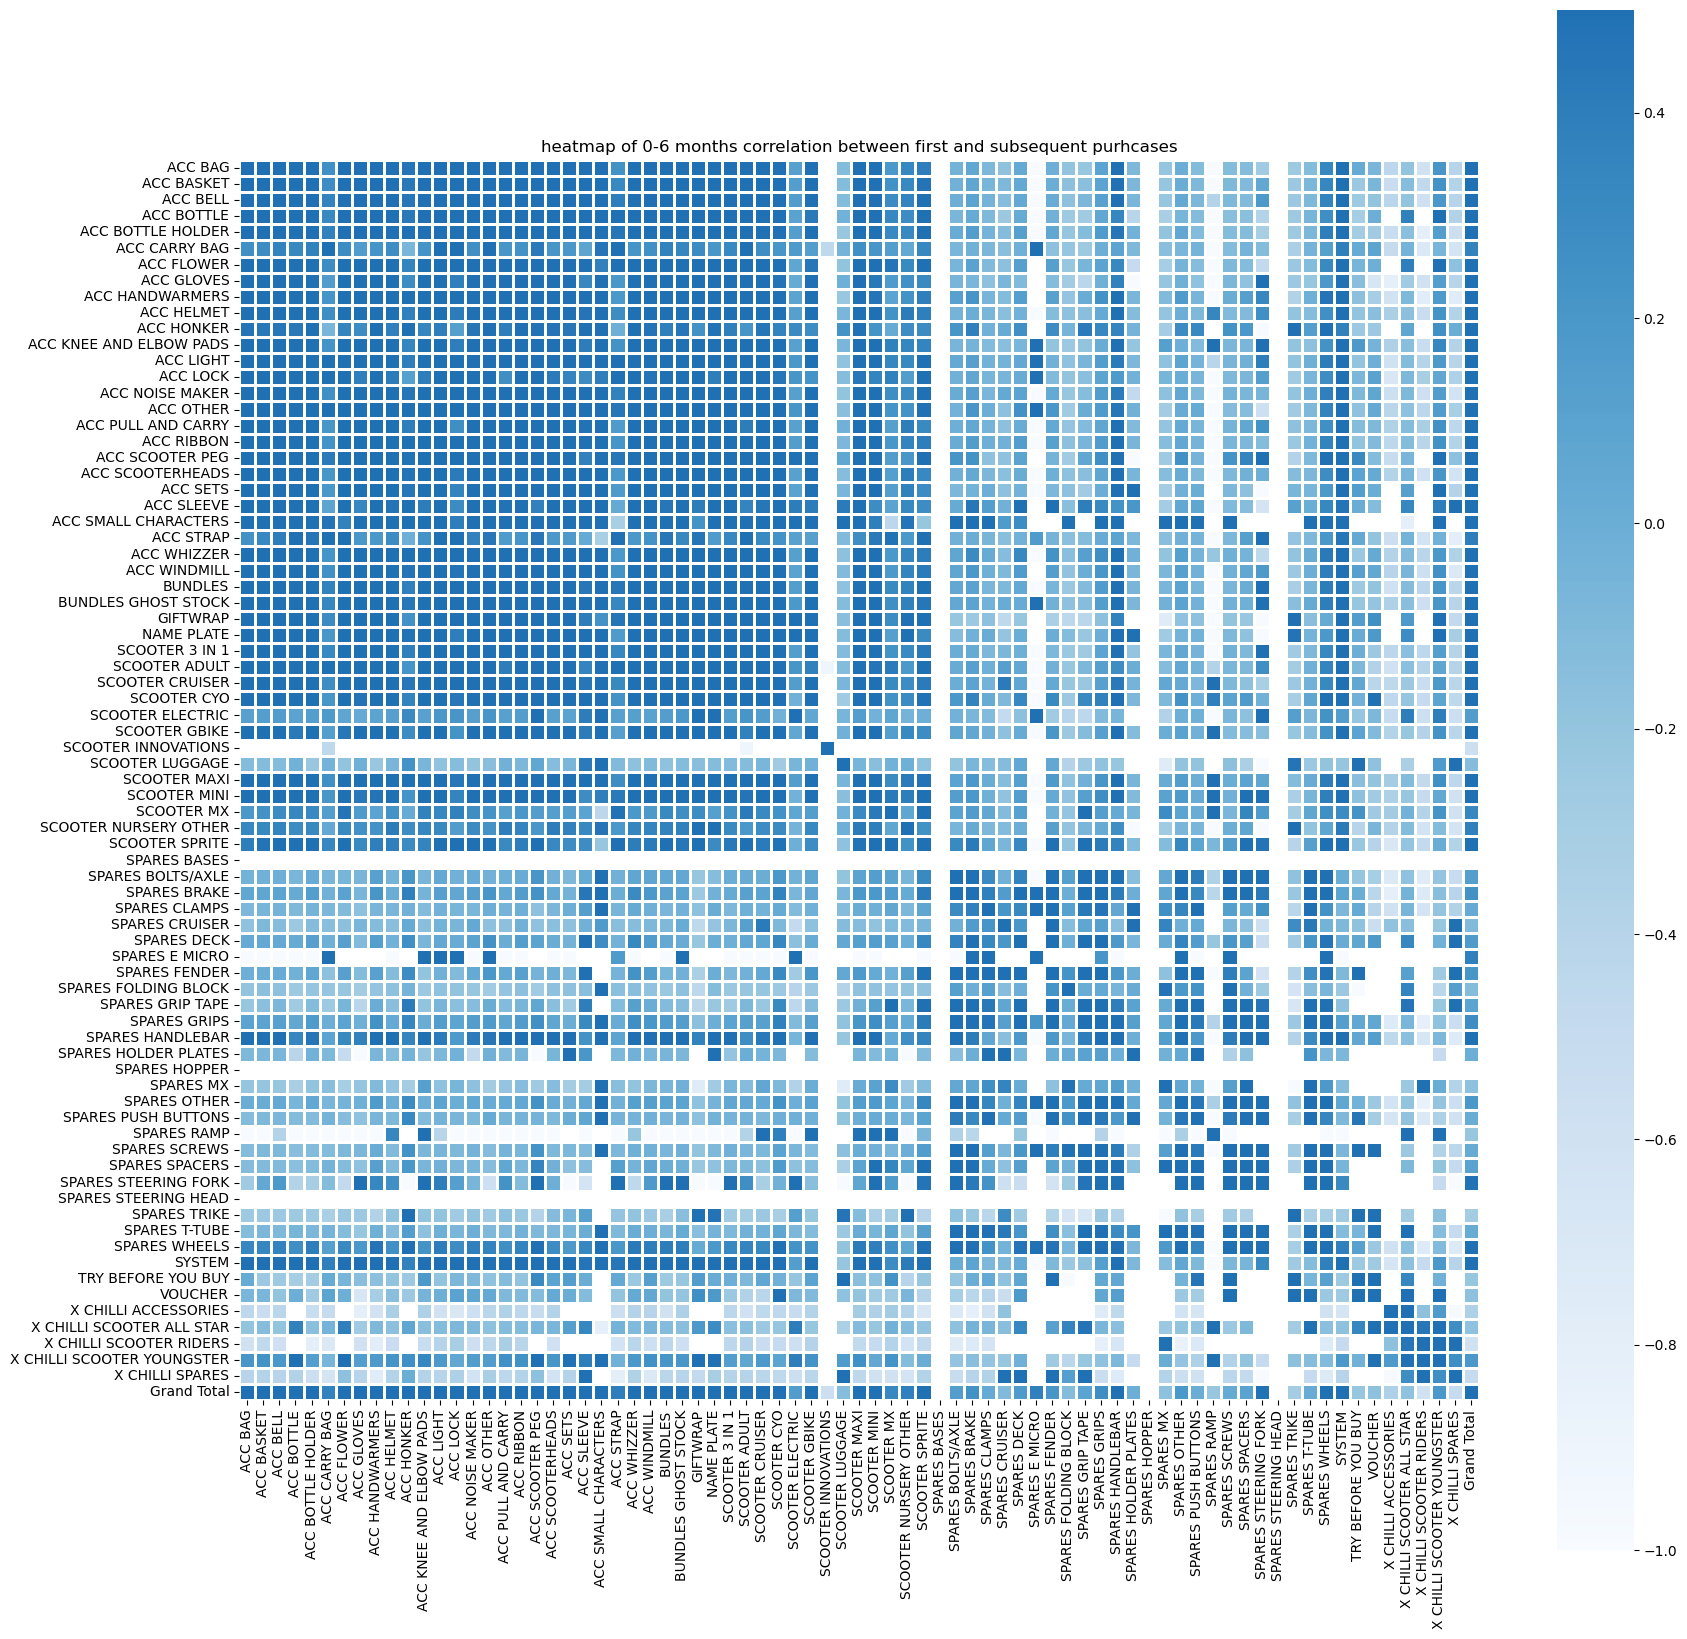

In [39]:
corr = d2.corr()
plt.figure(figsize=(20, 20))
plt.title("heatmap of 0-6 months correlation between first and subsequent purhcases")
sns.heatmap(corr, vmax=0.5, center=0, square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")

### Lets try and categorise the table as this still doesn't show us much

